In [165]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk

from textblob import TextBlob
from collections import Counter

#from nltk.tokenize import WordPunctTokenizer()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# 1B- Sentimental Analysis

A Sentiment Analysis on Headlines

In [166]:
col_list = ["text"]
review = pd.read_csv("D:/study/tutorialPoint/Covid 19 text analysis/omicron.csv", usecols=col_list)

In [167]:
review= review

In [168]:
review

,text
0,Daily US Confirmed Covid Cases by County For M...
1,@Yascha_Mounk #CDC says number of fully #vacci...
2,Daily US Confirmed Covid Cases by County For L...
3,Daily US Confirmed Covid Cases by County For L...
4,With the #Beijing2022 #WinterOlympics already ...
...,...
17041,As more of us head back into office environmen...
17042,After long time it’s such a great feeling to w...
17043,#NewZealand #LongCovidKids #Masks #ventilation...
17044,Can a patient be co-infected with different #v...


In [169]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

In [170]:
#Sentiment analysis of complete data

df1=review

df1['text'] = df1['text'].astype(str)

a='. '
for i in range(0,len(df1)):
    a=a+review['text'][i]
blob = TextBlob(a)
blob.sentiment 

Sentiment(polarity=0.11308686786397787, subjectivity=0.4949662635754508)

Headline Pre-processing in a new column 

In [171]:
def preprocess_sentences(text):
    text = text.lower()
    text=text.strip()  #get rid of leading/trailing whitespace 
      
    temp_sent =[]
    words = nltk.word_tokenize(text)
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        if tags[i][1] in VERB_CODES:
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha()and len(lemmatized)>2:
            temp_sent.append(lemmatized)

    finalsent = ' '.join(temp_sent)
    
    return finalsent


review["clean_text"]= review["text"].apply(preprocess_sentences)

In [172]:
review

,text,clean_text
0,Daily US Confirmed Covid Cases by County For M...,daily confirm covid case county covid insight ...
1,@Yascha_Mounk #CDC says number of fully #vacci...,cdc say number fully vaccinated omicron patien...
2,Daily US Confirmed Covid Cases by County For L...,daily confirm covid case county covid insight ...
3,Daily US Confirmed Covid Cases by County For L...,daily confirm covid case county covid insight ...
4,With the #Beijing2022 #WinterOlympics already ...,winterolympics already underway olympian look ...
...,...,...
17041,As more of us head back into office environmen...,head back office environment article call way ...
17042,After long time it’s such a great feeling to w...,long time great feeling watch live internation...
17043,#NewZealand #LongCovidKids #Masks #ventilation...,newzealand longcovidkids mask ventilation scho...
17044,Can a patient be co-infected with different #v...,patient different variant yes common possible ...


Individual Headline Polarity

In [173]:
df = review #creating a dataset for further use so as to not create ab impact on orignal

In [174]:
df

,text,clean_text
0,Daily US Confirmed Covid Cases by County For M...,daily confirm covid case county covid insight ...
1,@Yascha_Mounk #CDC says number of fully #vacci...,cdc say number fully vaccinated omicron patien...
2,Daily US Confirmed Covid Cases by County For L...,daily confirm covid case county covid insight ...
3,Daily US Confirmed Covid Cases by County For L...,daily confirm covid case county covid insight ...
4,With the #Beijing2022 #WinterOlympics already ...,winterolympics already underway olympian look ...
...,...,...
17041,As more of us head back into office environmen...,head back office environment article call way ...
17042,After long time it’s such a great feeling to w...,long time great feeling watch live internation...
17043,#NewZealand #LongCovidKids #Masks #ventilation...,newzealand longcovidkids mask ventilation scho...
17044,Can a patient be co-infected with different #v...,patient different variant yes common possible ...


In [175]:
df.pop("text")
df.rename(columns={"clean_text":"review"},inplace=True)

In [176]:
df

,review
0,daily confirm covid case county covid insight ...
1,cdc say number fully vaccinated omicron patien...
2,daily confirm covid case county covid insight ...
3,daily confirm covid case county covid insight ...
4,winterolympics already underway olympian look ...
...,...
17041,head back office environment article call way ...
17042,long time great feeling watch live internation...
17043,newzealand longcovidkids mask ventilation scho...
17044,patient different variant yes common possible ...


In [177]:
from textblob import TextBlob
df['polarity'] = df.apply(lambda x: TextBlob(x['review']).sentiment.polarity, axis=1)
df['subjectivity'] = df.apply(lambda x: TextBlob(x['review']).sentiment.subjectivity, axis=1)

In [178]:
df.head(20)  #individual Headline polarity 

,review,polarity,subjectivity
0,daily confirm covid case county covid insight ...,0.000000,0.000000
1,cdc say number fully vaccinated omicron patien...,0.000000,0.000000
2,daily confirm covid case county covid insight ...,0.000000,0.000000
3,daily confirm covid case county covid insight ...,0.000000,0.000000
4,winterolympics already underway olympian look ...,-0.200000,0.400000
5,doctor help discover omicron say pressure reve...,0.333333,0.500000
6,someone use term corona refer virus today hear...,-0.500000,1.000000
7,daily confirm covid case county covid insight ...,0.000000,0.000000
8,month tonga finally omicron people single vaxx...,-0.196429,0.517857
9,daily confirm covid case county covid insight ...,0.000000,0.000000


# # Positive Sentimental Analysis

In [179]:
df_positive=df[df.polarity>0]

In [180]:
df_positive

,review,polarity,subjectivity
5,doctor help discover omicron say pressure reve...,0.333333,0.500000
11,covid pandemic continue ukraine case rapidly r...,0.187500,0.437500
12,covid europeanunion notification new case stil...,0.148182,0.497273
19,latest customer feedback management daily http...,0.233333,0.366667
25,best way fight omicron variant getboosted visi...,1.000000,0.300000
...,...,...,...
17033,give straight promise always would see covid c...,0.200000,0.400000
17035,omicron subvariant new symptom world healt htt...,0.136364,0.454545
17036,excite siem reap hear first hand aussie busine...,0.250000,0.333333
17041,head back office environment article call way ...,0.183333,0.350000


In [181]:
X_ptrain, X_phold = train_test_split(df_positive, test_size=0.3, random_state=111)
print(X_ptrain.shape)
print(X_phold.shape)

(3749, 3)
(1607, 3)


In [182]:
def tokenize(text):
   tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2) ] ##lenght more than 3 and  dont take xxx symbols 
   
   return tokens

In [183]:
vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, max_df=0.6, min_df=50, max_features=10000, use_idf=False, norm=None) ##if words occur in less than 50 docs remove that word
tf_pvectors = vectorizer_tf.fit_transform(X_ptrain.review)    
###idf is false then it wont take idf therefore it will run on count vectorization

In [184]:
tf_pvectors.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [185]:
from sklearn import decomposition
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [186]:
lda = decomposition.LatentDirichletAllocation(n_components=5, max_iter=3, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
##similar like pca and reduced dimensions to 6
WP1 = lda.fit_transform(tf_pvectors)
HP1 = lda.components_

In [187]:
print(WP1)
print(HP1)

[[0.05029675 0.05026111 0.79897824 0.05014234 0.05032156]
 [0.0400015  0.04060117 0.04012645 0.44269321 0.43657767]
 [0.83911003 0.04000572 0.04081351 0.04004825 0.0400225 ]
 ...
 [0.10000057 0.10000034 0.10000194 0.59992352 0.10007363]
 [0.06819383 0.72641364 0.06879803 0.06791322 0.06868128]
 [0.06704731 0.72886107 0.06887472 0.06723313 0.06798377]]
[[2.13193658e-01 8.49401183e+01 2.13675110e-01 2.19334296e-01
  2.25844850e-01 2.34894401e-01 1.16472955e+02 1.47771906e+00
  2.13298326e-01 2.38886288e-01 5.72333415e+01 3.94302327e-01
  2.20313925e-01 1.53070777e+01 1.25652690e+02 3.18540005e-01
  2.32890172e-01 2.33156330e-01 5.64860551e-01 5.65647392e+01
  2.19466182e-01 2.15194055e-01 2.27289366e-01 2.15141957e-01
  2.19220466e-01 2.30052714e+00 8.92029798e-01 1.20403124e+02
  3.05579655e-01 1.03159903e+01 9.54846799e+01 5.12562598e+01
  2.29446077e-01 2.19286139e-01 2.18360601e-01 2.17916769e-01
  2.15430483e-01 2.22328158e-01 2.15890971e-01 2.21974921e-01
  7.72354913e+01 1.0888235

In [188]:
num_words=15

vocab = np.array(vectorizer_tf.get_feature_names())

top_pwords = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_pwords = ([top_pwords(t) for t in HP1])
positive_topics = [' '.join(t) for t in topic_pwords]

In [189]:
positive_topics #Headlines with positive sentiments

['covid give case would last high omicron always know straight promise take variant corona disease',
 'omicron covid vaccine people infection mask live india pandemic could better effective million still delta',
 'omicron variant coronavirus come latest mild keep update study look virus lead find today available',
 'case report omicron death covid today time booster news many update daily year even right',
 'omicron test positive good wave health covid evidence show strong rate first child week early']

In [190]:
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_ptrain.review))]
df_doc_ptopic = pd.DataFrame(np.round(WP1, 2), columns=colnames, index=docnames)
significant_positive_topic = np.argmax(df_doc_ptopic.values, axis=1)
df_doc_ptopic['dominant_topic'] = significant_positive_topic

In [191]:
df_doc_ptopic

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.05,0.05,0.80,0.05,0.05,2
Doc1,0.04,0.04,0.04,0.44,0.44,3
Doc2,0.84,0.04,0.04,0.04,0.04,0
Doc3,0.10,0.10,0.59,0.10,0.10,2
Doc4,0.25,0.40,0.22,0.03,0.10,1
...,...,...,...,...,...,...
Doc3744,0.07,0.46,0.07,0.34,0.07,1
Doc3745,0.05,0.05,0.30,0.55,0.05,3
Doc3746,0.10,0.10,0.10,0.60,0.10,3
Doc3747,0.07,0.73,0.07,0.07,0.07,1


In [192]:
df_doc_ptopic['dominant_topic'].value_counts()

2    1053
1     793
3     746
0     605
4     552
Name: dominant_topic, dtype: int64

In [193]:
X_ptrain.head()

,review,polarity,subjectivity
13606,omicron variant virus cause originate animal i...,0.500000,0.500000
10025,feb summary bengaluru per bbmpcomm amp dhfwka ...,0.113636,0.272727
2374,mrbeast joebiden last three day mother corona ...,0.068182,0.260606
9868,maintenance worker landlord apartment omicron ...,0.800000,0.750000
1002,breaking australia top health official say peo...,0.250000,0.250000


In [194]:
WPHold = lda.transform(vectorizer_tf.transform(X_phold.review[:5]))

# # Negetive Sentimental Analysis

In [195]:
df_negetive=df[df.polarity<0]
print(df_negetive)

X_ntrain, X_nhold = train_test_split(df_negetive, test_size=0.3, random_state=111)
print(X_ntrain.shape)
print(X_nhold.shape)

vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, max_df=0.7, min_df=20 , max_features=10000, use_idf=False, norm=None) ##if words occur in less than 50 docs remove that word
tf_nvectors = vectorizer_tf.fit_transform(X_ntrain.review)    
###idf is false then it wont take idf therefore it will run on count vectorization

print(tf_nvectors.A)

lda = decomposition.LatentDirichletAllocation(n_components=5, max_iter=3, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
##similar like pca and reduced dimensions to 6
WN1 = lda.fit_transform(tf_nvectors)
HN1 = lda.components_

print(WN1)
print(HN1)

vocab = np.array(vectorizer_tf.get_feature_names())

top_nwords = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_nwords = ([top_nwords(t) for t in HN1])
negetive_topics = [' '.join(t) for t in topic_nwords]

                                                  review  polarity  \
4      winterolympics already underway olympian look ... -0.200000   
6      someone use term corona refer virus today hear... -0.500000   
8      month tonga finally omicron people single vaxx... -0.196429   
39                       davethemurse sorry omicron suck -0.500000   
43     omicron milder variant delta make dangerous np... -0.600000   
...                                                  ...       ...   
17026  know government handle pandemic badly even fai... -0.350000   
17027  truth finally announce wait two year past two ... -0.062500   
17031  capt treat omicron lyk common cold vaccineside... -0.450000   
17037  india friday report net decrease active corona... -0.066667   
17044  patient different variant yes common possible ... -0.100000   

       subjectivity  
4          0.400000  
6          1.000000  
8          0.517857  
39         1.000000  
43         0.900000  
...             ...  
17026

In [196]:
negetive_topics #Headlines with positive sentiments

['omicron covid previous long tell infection know news truth pandemic could fake medium time report',
 'record late vaccine lockdown track another early health trace didoing glib meal rishi unlock avoid',
 'omicron case coronavirus virus world report mean take bring around india cold sadly military death',
 'omicron case past death infect population worse covid hour mask thing serious total vaccination booster',
 'omicron variant come still base detrick fort year need test study truth people dangerous wave']

In [197]:
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_ntrain.review))]
df_doc_ntopic = pd.DataFrame(np.round(WN1, 2), columns=colnames, index=docnames)
significant_negetive_topic = np.argmax(df_doc_ntopic.values, axis=1)
df_doc_ntopic['dominant_topic'] = significant_negetive_topic

In [198]:
print(df_doc_ntopic)

         Topic0  Topic1  Topic2  Topic3  Topic4  dominant_topic
Doc0       0.07    0.07    0.73    0.07    0.07               2
Doc1       0.04    0.04    0.28    0.04    0.60               4
Doc2       0.07    0.07    0.07    0.07    0.73               4
Doc3       0.05    0.05    0.31    0.05    0.54               4
Doc4       0.20    0.20    0.20    0.20    0.20               0
...         ...     ...     ...     ...     ...             ...
Doc1447    0.05    0.05    0.80    0.05    0.05               2
Doc1448    0.04    0.04    0.04    0.04    0.84               4
Doc1449    0.02    0.02    0.02    0.02    0.93               4
Doc1450    0.10    0.10    0.10    0.10    0.59               4
Doc1451    0.87    0.03    0.03    0.03    0.03               0

[1452 rows x 6 columns]


In [199]:
df_doc_ntopic['dominant_topic'].value_counts()

4    477
0    448
2    225
3    206
1     96
Name: dominant_topic, dtype: int64

In [200]:
WNHold = lda.transform(vectorizer_tf.transform(X_phold.review[:5]))

# Neutral Reviews 

In [201]:
df_neutral=df[df.polarity==0]
print(df_neutral)

X_neutrain, X_nuehold = train_test_split(df_neutral, test_size=0.3, random_state=111)
print(X_neutrain.shape)
print(X_nuehold.shape)

vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, max_df=0.7, min_df=20 , max_features=10000, use_idf=False, norm=None) ##if words occur in less than 50 docs remove that word
tf_neuvectors = vectorizer_tf.fit_transform(X_neutrain.review)    
###idf is false then it wont take idf therefore it will run on count vectorization

print(tf_neuvectors.A)

lda = decomposition.LatentDirichletAllocation(n_components=5, max_iter=3, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
##similar like pca and reduced dimensions to 6
WN1 = lda.fit_transform(tf_neuvectors)
HN1 = lda.components_

print(WN1)
print(HN1)

vocab = np.array(vectorizer_tf.get_feature_names())

top_neuwords = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_neuwords = ([top_neuwords(t) for t in HN1])
neutral_topics = [' '.join(t) for t in topic_neuwords]

                                                  review  polarity  \
0      daily confirm covid case county covid insight ...       0.0   
1      cdc say number fully vaccinated omicron patien...       0.0   
2      daily confirm covid case county covid insight ...       0.0   
3      daily confirm covid case county covid insight ...       0.0   
7      daily confirm covid case county covid insight ...       0.0   
...                                                  ...       ...   
17038  drahmedkalebi manage inevitable insightful wor...       0.0   
17039  cuba also administer booster counter omicron w...       0.0   
17040  please note update announcement always discord...       0.0   
17043  newzealand longcovidkids mask ventilation scho...       0.0   
17045  dcyellowcab pay via electronic payment contact...       0.0   

       subjectivity  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
7               0.0  
...             ...  
17038

In [148]:
neutral_topics #Headlines with positive sentiments

['omicron people pandemic fort detrick delta virus come still country government india minister take would',
 'covid insight analytics county team death case population confirm growth daily total distribution state life',
 'omicron need drericding report help cdcgov erictopol know mtosterholm covidwatch scottgottliebmd truth emergency time tell',
 'omicron vaccine variant covid show infection update study report news enough world restriction vaccination like',
 'omicron coronavirus give mask health case wave believe milder inevitable surrender surge variant today subvariant']

In [150]:
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_neutrain.review))]
df_doc_neutopic = pd.DataFrame(np.round(WN1, 2), columns=colnames, index=docnames)
significant_neutral_topic = np.argmax(df_doc_neutopic.values, axis=1)
df_doc_neutopic['dominant_topic'] = significant_neutral_topic

In [151]:
print(df_doc_neutopic)

         Topic0  Topic1  Topic2  Topic3  Topic4  dominant_topic
Doc0       0.03    0.03    0.03    0.90    0.03               3
Doc1       0.02    0.92    0.02    0.02    0.02               1
Doc2       0.10    0.10    0.10    0.60    0.10               3
Doc3       0.03    0.19    0.03    0.03    0.71               4
Doc4       0.03    0.35    0.03    0.54    0.03               3
...         ...     ...     ...     ...     ...             ...
Doc6725    0.20    0.20    0.53    0.03    0.03               2
Doc6726    0.03    0.03    0.03    0.46    0.44               3
Doc6727    0.10    0.10    0.10    0.59    0.10               3
Doc6728    0.02    0.92    0.02    0.02    0.02               1
Doc6729    0.22    0.04    0.22    0.49    0.03               3

[6730 rows x 6 columns]


In [152]:
df_doc_neutopic['dominant_topic'].value_counts()

1    2061
3    1639
4    1255
0    1201
2     574
Name: dominant_topic, dtype: int64

In [153]:
WNHold = lda.transform(vectorizer_tf.transform(X_phold.review[:5]))

# 2D- Clustering

In [120]:
import re

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc) #replace all the characters i.e blank which dont belong to this text
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document) #here we vectorize the function as compared to previous program #you can use the 11th session tecniqe by using apply aslo

norm_corpus = normalize_corpus(list(review['review'])) ##pasing list in the function
len(norm_corpus)


17046

In [121]:
cv = CountVectorizer(ngram_range=(1, 2), min_df=70, max_df=0.6) ##collect tokens which have occured more than 10 documents if there is no point
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

(17046, 448)

In [370]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = 30
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=1000, n_init=50, random_state=42).fit(cv_matrix)
km

KMeans(max_iter=1000, n_clusters=30, n_init=50, random_state=42)

In [371]:
from collections import Counter

Counter(km.labels_)  #tells how many documents are going in which cluser

Counter({1: 2632,
         0: 11663,
         6: 112,
         27: 122,
         7: 332,
         29: 89,
         23: 211,
         4: 81,
         25: 34,
         8: 215,
         3: 282,
         11: 36,
         24: 26,
         12: 127,
         10: 156,
         17: 63,
         16: 25,
         2: 104,
         13: 205,
         19: 21,
         28: 52,
         22: 75,
         20: 53,
         26: 33,
         5: 70,
         15: 81,
         9: 31,
         14: 32,
         18: 26,
         21: 57})

In [372]:
feature_names = cv.get_feature_names()
topn_features = 10
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['health', 'times', 'paul', 'post', 'india', 'david', 'ravi', 'john', 'neoskeptics', 'philippines']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['joyner', 'nathan joyner', 'nathan', 'erwin', 'explorer', 'express', 'feiglding', 'frank', 'frank west', 'fraser']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['gkay', 'jesus', 'gkay jesus', 'girly', 'george', 'geoffrey norman', 'girly swots', 'geoffrey', 'gee', 'eric feiglding']
--------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['save', 'save democracy', 'democracy', 'zerocovid', 'frank west', 'erwin loh', 'explorer', 'express', 'feiglding', 'frank']
--------------------------------------------------------------------------------
CLUSTER #5
Key Features: ['raj', 'raj rajnarayanan', 'rajnarayanan', 'zerocovid', 'frank', 'eric feiglding', 'erw

In [369]:
css = [] 
for i in range(1, 60): 
    kmeans = KMeans(n_clusters=i, max_iter=10, n_init=20, random_state=42).fit(cv_matrix)
    css.append(kmeans.inertia_)
print(css)

[20267.04968908137, 13576.950811712875, 12746.354868383418, 12223.209766071363, 11811.333617199225, 11532.84030004224, 11258.230690153645, 10822.181834232751, 10505.062549537108, 10273.326655385434, 10112.44694679194, 9782.533099263319, 9504.626846600286, 9290.228403937144, 9026.219701330465, 8983.60332043526, 8673.664015325538, 8513.164913898376, 8305.331607711165, 8044.998209936184, 7968.13755844308, 7744.624190779812, 7556.583637730704, 7338.383451178341, 7175.795313700256, 6984.802644869317, 6951.668605829609, 6667.144833228727, 6592.566770352623, 6354.7103369309625, 6474.185670342251, 6124.385424303091, 5986.07213546774, 5931.71312349991, 5810.103208477966, 5713.349471389008, 5623.898191097419, 5517.516947177299, 5390.81756621341, 5351.902365707028, 5209.504013514517, 5139.230184018781, 4977.080139904371, 4860.888345906291, 4854.288632639083, 4767.7796283784155, 4612.400427575104, 4599.907433398564, 4474.662350607088, 4432.537051486457, 4386.055278938422, 4247.176004764808, 4234.3

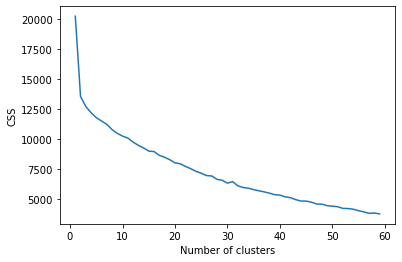

In [367]:
import matplotlib.pyplot as plt
plt.plot(range(1, 60), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

##### Taking at max 10 clusters is optimal for the given dataset as it is clearly visible that after 10 clusters the data is not getting better clustering results

# Hashtags Clustering

In [130]:
col_list = ["hashtags"]
hashtag = pd.read_csv("D:/study/tutorialPoint/Covid 19 text analysis/omicron.csv", usecols=col_list)

In [134]:
hashtag=hashtag

hashtag['hashtags'] = hashtag['hashtags'].astype(str)

a='. '
for i in range(0,len(df1)):
    a=a+hashtag['hashtags'][i]


Sentiment(polarity=0.034214106052050754, subjectivity=0.37065687935253167)

In [135]:
norm_corpus_hash = normalize_corpus(list(hashtag['hashtags'])) ##pasing list in the function
len(norm_corpus_hash)

17046

In [136]:
cv = CountVectorizer(ngram_range=(1, 2), min_df=20, max_df=0.6) ##collect tokens which have occured more than 10 documents if there is no point
cv_matrix = cv.fit_transform(norm_corpus_hash)
cv_matrix.shape

(17046, 175)

In [373]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = 2
km_hash = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=30, random_state=42).fit(cv_matrix)
km_hash

KMeans(max_iter=100, n_clusters=2, n_init=30, random_state=42)

In [374]:
Counter(km_hash.labels_)

Counter({1: 2632, 0: 14414})

In [375]:
feature_names = cv.get_feature_names()
topn_features = 10
ordered_centroids = km_hash.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['news', 'democracy', 'save', 'save democracy', 'dr', 'tomthunkit', 'newsonline', 'medical', 'marie', 'druider']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['joyner', 'nathan joyner', 'nathan', 'erwin', 'explorer', 'express', 'feiglding', 'frank', 'frank west', 'fraser']
--------------------------------------------------------------------------------


In [214]:
css = [] 
for i in range(1, 8): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=50, random_state=42).fit(cv_matrix)
    css.append(kmeans.inertia_)
print(css)

[20267.04968908137, 13576.950811712875, 12746.354868383418, 12191.765977177412, 11811.333617199225, 11525.305073579257, 11145.22293826077]


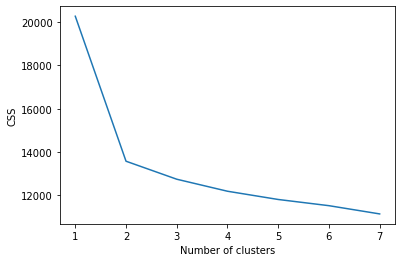

In [227]:
import matplotlib.pyplot as plt
plt.plot(range(1, 8), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

#### 4 or 5 clusters will be appropreae for the hashtags data.

Geographical Analysis

In [278]:
col_list = ["text", "user_location"]
loc_rev = pd.read_csv("D:/study/tutorialPoint/Covid 19 text analysis/omicron.csv", usecols=col_list)

In [279]:
loc_rev

,user_location,text
0,"Los Angeles, CA",Daily US Confirmed Covid Cases by County For M...
1,Corporate,@Yascha_Mounk #CDC says number of fully #vacci...
2,"Los Angeles, CA",Daily US Confirmed Covid Cases by County For L...
3,"Los Angeles, CA",Daily US Confirmed Covid Cases by County For L...
4,"Bay Shore, NY",With the #Beijing2022 #WinterOlympics already ...
...,...,...
17041,"Scotland, United Kingdom",As more of us head back into office environmen...
17042,"Auckland Region, New Zealand",After long time it’s such a great feeling to w...
17043,Plague Island,#NewZealand #LongCovidKids #Masks #ventilation...
17044,Switzerland & Singapore,Can a patient be co-infected with different #v...


In [280]:
loc_rev['user_location'].value_counts()

Los Angeles, CA                 2658
India                            474
USA                              325
In Your Mind Now                 211
Chandigarh                       210
                                ... 
North Kingstown, RI                1
Global                             1
Kiev                               1
Pompano Beach, FL                  1
Auckland Region, New Zealand       1
Name: user_location, Length: 2474, dtype: int64

Selecting a specific location and performing analysis

In [281]:
location = "Los Angeles, CA"
df2 = loc_rev[loc_rev['user_location'] == location]

In [282]:
df2

,user_location,text
0,"Los Angeles, CA",Daily US Confirmed Covid Cases by County For M...
2,"Los Angeles, CA",Daily US Confirmed Covid Cases by County For L...
3,"Los Angeles, CA",Daily US Confirmed Covid Cases by County For L...
7,"Los Angeles, CA",Daily US Confirmed Covid Cases by County For K...
9,"Los Angeles, CA",Daily US Confirmed Covid Cases by County For K...
...,...,...
15418,"Los Angeles, CA",Experts urge US cities and states to prep for ...
15556,"Los Angeles, CA",See how #Omicron and #labor #shortages may aff...
16288,"Los Angeles, CA",Been a while since we've taken a real vacation...
16511,"Los Angeles, CA",This is irresponsible coverage ⁦@CNN⁩. HK migh...


In [283]:
df2.pop('user_location')

0        Los Angeles, CA
2        Los Angeles, CA
3        Los Angeles, CA
7        Los Angeles, CA
9        Los Angeles, CA
              ...       
15418    Los Angeles, CA
15556    Los Angeles, CA
16288    Los Angeles, CA
16511    Los Angeles, CA
16698    Los Angeles, CA
Name: user_location, Length: 2658, dtype: object

In [296]:
df2

,text
0,Daily US Confirmed Covid Cases by County For M...
2,Daily US Confirmed Covid Cases by County For L...
3,Daily US Confirmed Covid Cases by County For L...
7,Daily US Confirmed Covid Cases by County For K...
9,Daily US Confirmed Covid Cases by County For K...
...,...
15418,Experts urge US cities and states to prep for ...
15556,See how #Omicron and #labor #shortages may aff...
16288,Been a while since we've taken a real vacation...
16511,This is irresponsible coverage ⁦@CNN⁩. HK migh...


In [299]:
df2 = df2.reset_index()

In [300]:
df2

,index,text
0,0,Daily US Confirmed Covid Cases by County For M...
1,2,Daily US Confirmed Covid Cases by County For L...
2,3,Daily US Confirmed Covid Cases by County For L...
3,7,Daily US Confirmed Covid Cases by County For K...
4,9,Daily US Confirmed Covid Cases by County For K...
...,...,...
2653,15418,Experts urge US cities and states to prep for ...
2654,15556,See how #Omicron and #labor #shortages may aff...
2655,16288,Been a while since we've taken a real vacation...
2656,16511,This is irresponsible coverage ⁦@CNN⁩. HK migh...


In [301]:
df2.pop("index")

0           0
1           2
2           3
3           7
4           9
        ...  
2653    15418
2654    15556
2655    16288
2656    16511
2657    16698
Name: index, Length: 2658, dtype: int64

In [302]:
df1=df2

df1['text'] = df1['text'].astype(str)

a='. '
for i in range(0,len(df1)):
    a=a+df2['text'][i]

blob = TextBlob(a)
blob.sentiment 

Sentiment(polarity=0.38053181694596133, subjectivity=0.9384141755471285)

In [312]:
X_laTrain, X_laHold = train_test_split(df2, test_size=0.3, random_state=111)
print(X_laTrain.shape)
print(X_laHold.shape)

vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, max_df=0.7, min_df=100 , max_features=10000, use_idf=False, norm=None) ##if words occur in less than 50 docs remove that word
tf_laVectors = vectorizer_tf.fit_transform(X_laTrain.text)    
###idf is false then it wont take idf therefore it will run on count vectorization

print(tf_laVectors.A)

lda = decomposition.LatentDirichletAllocation(n_components=5, max_iter=3, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
##similar like pca and reduced dimensions to 6
WN1 = lda.fit_transform(tf_laVectors)
HN1 = lda.components_

print(WN1)
print(HN1)

vocab = np.array(vectorizer_tf.get_feature_names())

top_laWords = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_laWords = ([top_laWords(t) for t in HN1])
LA_topics = [' '.join(t) for t in topic_laWords]

(1860, 1)
(798, 1)
[[0. 0. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[0.36753824 0.03361384 0.53123624 0.03413509 0.03347659]
 [0.39073042 0.04001719 0.04063091 0.04047148 0.48815001]
 [0.03364491 0.0335202  0.86427901 0.03409607 0.0344598 ]
 ...
 [0.03369745 0.86588153 0.03365835 0.03342111 0.03334156]
 [0.39073042 0.04001719 0.04063091 0.04047148 0.48815001]
 [0.04164483 0.04030786 0.83676158 0.04041005 0.04087569]]
[[2.69797946e-01 2.81605293e+02 3.57562513e-01 3.65335159e+01
  3.98492864e-01 3.14174188e-01 2.83579813e-01 3.34368342e+02
  2.90981435e-01 1.30372426e+02 2.30379422e+02 3.11314091e-01
  3.66456062e+01 2.84507729e-01 7.94543056e-01 2.77713844e-01
  1.74537959e+02]
 [1.42713664e+02 7.74150789e-01 1.53945037e+02 2.95080896e-01
  2.75233483e-01 2.16985441e+00 1.39244762e+02 1.08786431e+01
  3.08527865e+02 4.99993504e-01 1.48304054e+02 1.70198787e+02
  2.67873277e-01 1.

In [310]:
LA_topics

['deaths 2022-02-10 population usa… growth tea… cases usafacts… confirmed 2022-02-14 daily state distribution total death',
 'distribution state 2022-02-14 total population 2022-02-08 death usafacts… usafac… deaths usa… daily 2022-02-10 growth cases',
 '2022-02-14 population growth cases tea… confirmed deaths daily usa… usafacts… 2022-02-10 distribution state death usafac…',
 'usafacts… 2022-02-14 cases confirmed daily deaths total 2022-02-08 growth distribution population 2022-02-10 tea… death usafac…',
 'confirmed growth cases 2022-02-10 2022-02-14 deaths population tea… state distribution death daily 2022-02-08 usafacts… total']

In [314]:
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_laTrain.text))]
df_doc_LaTopic = pd.DataFrame(np.round(WN1, 2), columns=colnames, index=docnames)
significant_la_topic = np.argmax(df_doc_LaTopic.values, axis=1)
df_doc_LaTopic['dominant_topic'] = significant_la_topic

In [315]:
print(df_doc_LaTopic)

         Topic0  Topic1  Topic2  Topic3  Topic4  dominant_topic
Doc0       0.37    0.03    0.53    0.03    0.03               2
Doc1       0.39    0.04    0.04    0.04    0.49               4
Doc2       0.03    0.03    0.86    0.03    0.03               2
Doc3       0.84    0.04    0.04    0.04    0.04               0
Doc4       0.03    0.03    0.86    0.03    0.03               2
...         ...     ...     ...     ...     ...             ...
Doc1855    0.03    0.87    0.03    0.03    0.03               1
Doc1856    0.39    0.04    0.04    0.04    0.49               4
Doc1857    0.03    0.87    0.03    0.03    0.03               1
Doc1858    0.39    0.04    0.04    0.04    0.49               4
Doc1859    0.04    0.04    0.84    0.04    0.04               2

[1860 rows x 6 columns]


In [316]:
df_doc_LaTopic['dominant_topic'].value_counts()

2    522
3    476
1    329
0    279
4    254
Name: dominant_topic, dtype: int64

User Details

In [342]:
col_list = ["text", "user_name"]
user_rev = pd.read_csv("D:/study/tutorialPoint/Covid 19 text analysis/omicron.csv", usecols=col_list)

user_rev

,user_name,text
0,Nathan Joyner,Daily US Confirmed Covid Cases by County For M...
1,Gatherer Thompson,@Yascha_Mounk #CDC says number of fully #vacci...
2,Nathan Joyner,Daily US Confirmed Covid Cases by County For L...
3,Nathan Joyner,Daily US Confirmed Covid Cases by County For L...
4,Brownyard Group,With the #Beijing2022 #WinterOlympics already ...
...,...,...
17041,Self Clean Solutions,As more of us head back into office environmen...
17042,Kuldip Patel,After long time it’s such a great feeling to w...
17043,Dr Asad Khan FRCP FRACP 🇵🇸🇳🇿🇮🇳🇬🇧#FBLC,#NewZealand #LongCovidKids #Masks #ventilation...
17044,Dr. Melvin Sanicas | #GetVaccinated,Can a patient be co-infected with different #v...


In [343]:
user_rev['user_name'].value_counts()

Nathan Joyner                   2632
save DEMOCRACY                   282
Tomthunkit™                      211
Newsonline                       205
bron druider                     156
                                ... 
Time Of India                      1
RestaurantOwner                    1
Pandemic-Aid Networks              1
Lieutenant General Ron Place       1
Kuldip Patel                       1
Name: user_name, Length: 6012, dtype: int64

In [344]:
user = "save DEMOCRACY"
df2 = user_rev[user_rev['user_name'] == user]

df2.pop("user_name")

df2 = df2.reset_index()

df2

,index,text
0,268,DON’T SURRENDER TO #OMICRON\nJust bc you belie...
1,358,"WHAT HE SAID…\nI’ll give it to you straight, a..."
2,453,NIH Director Dr. Collins agrees with my analys...
3,484,2 IS NOT ENOUGH \nVaccines effectiveness estim...
4,494,NIH Director Dr. Collins agrees with my analys...
...,...,...
277,16933,2 IS NOT ENOUGH \nVaccines effectiveness estim...
278,16935,Keep looking at NY as the indicator for what's...
279,16958,DON’T SURRENDER TO #OMICRON\nJust bc you belie...
280,17032,DON’T SURRENDER TO #OMICRON\nJust bc you belie...


In [345]:
df1=df2

df1['text'] = df1['text'].astype(str)

a='. '
for i in range(0,len(df1)):
    a=a+df2['text'][i]

blob = TextBlob(a)
blob.sentiment 

Sentiment(polarity=0.07034834324553949, subjectivity=0.5267063154913634)

In [358]:
X_NJTrain, X_NJHold = train_test_split(df2, test_size=0.3, random_state=111)
print(X_NJTrain.shape)
print(X_NJHold.shape)

vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, max_df=0.65, min_df=30 , max_features=10000, use_idf=False, norm=None) ##if words occur in less than 50 docs remove that word
tf_NJVectors = vectorizer_tf.fit_transform(X_NJTrain.text)    
###idf is false then it wont take idf therefore it will run on count vectorization

print(tf_NJVectors.A)

lda = decomposition.LatentDirichletAllocation(n_components=3, max_iter=3, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
##similar like pca and reduced dimensions to 6
WN1 = lda.fit_transform(tf_NJVectors)
HN1 = lda.components_

print(WN1)
print(HN1)

vocab = np.array(vectorizer_tf.get_feature_names())

top_NJWords = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_NJWords = ([top_NJWords(t) for t in HN1])
NJ_topics = [' '.join(t) for t in topic_NJWords]

(197, 2)
(85, 2)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]]
[[0.75072584 0.13517663 0.11409753]
 [0.75072584 0.13517663 0.11409753]
 [0.16684283 0.1668335  0.66632366]
 [0.93733824 0.03081182 0.03184993]
 [0.93733824 0.03081182 0.03184993]
 [0.04185278 0.9151883  0.04295892]
 [0.02745373 0.94623276 0.0263135 ]
 [0.93733824 0.03081182 0.03184993]
 [0.02745373 0.94623276 0.0263135 ]
 [0.93733824 0.03081182 0.03184993]
 [0.02745373 0.94623276 0.0263135 ]
 [0.11520581 0.11125073 0.77354346]
 [0.75072584 0.13517663 0.11409753]
 [0.93733824 0.03081182 0.03184993]
 [0.16684283 0.1668335  0.66632366]
 [0.93733824 0.03081182 0.03184993]
 [0.16684283 0.1668335  0.66632366]
 [0.02745373 0.94623276 0.0263135 ]
 [0.16684283 0.1668335  0.66632366]
 [0.16684283 0.1668335  0.66632366]
 [0.75072584 0.13517663 0.11409753]
 [0.93733824 0.03081182 0.03184993]
 [0.93733824 0.03081182 0.03184993]

In [359]:
NJ_topics

['that inevitable surrender give milder just omicron will believe fighti… cases promised enough indicator going',
 'what cases that would always covid straight going give promised conti… said… cases/capita keep indicator',
 'enough omicron that believe will indicator what come going leading inevitable would cases said… milder']

In [360]:
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_NJTrain.text))]
df_doc_NJTopic = pd.DataFrame(np.round(WN1, 2), columns=colnames, index=docnames)
significant_NJ_topic = np.argmax(df_doc_NJTopic.values, axis=1)
df_doc_NJTopic['dominant_topic'] = significant_NJ_topic

In [361]:
print(df_doc_NJTopic)

        Topic0  Topic1  Topic2  dominant_topic
Doc0      0.75    0.14    0.11               0
Doc1      0.75    0.14    0.11               0
Doc2      0.17    0.17    0.67               2
Doc3      0.94    0.03    0.03               0
Doc4      0.94    0.03    0.03               0
...        ...     ...     ...             ...
Doc192    0.94    0.03    0.03               0
Doc193    0.75    0.14    0.11               0
Doc194    0.75    0.14    0.11               0
Doc195    0.04    0.92    0.04               1
Doc196    0.94    0.03    0.03               0

[197 rows x 4 columns]


In [362]:
df_doc_NJTopic['dominant_topic'].value_counts()

0    87
1    69
2    41
Name: dominant_topic, dtype: int64